## Link of used dataset:
https://www.kaggle.com/datasets/mahdimashayekhi/disease-risk-from-daily-habits

## Mount to Colab

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

## Download data and examine

In [3]:
health_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/health_lifestyle_classification.csv")
health_df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [4]:
health_df.shape

(100000, 48)

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [6]:
health_df.isnull().sum().sort_values()

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
bmi_estimated,0
bmi_scaled,0
bmi_corrected,0
waist_size,0


## A new dataframe: inference about columns

In [ ]:
def smart_round(x):
    return float(f"{x:.5f}".rstrip("0").rstrip("."))

variable_name = []
total_entry = []
missing_entry = []
missing_ratio = []
data_type = []
unique_values = []
max_value = []
min_value = []

for col in health_df.columns:
  variable_name.append(col)
  total_entry.append(health_df[col].shape[0])
  missing_entry.append(health_df[col].isnull().sum())
  missing_ratio.append(missing_entry[-1]/total_entry[-1])
  if health_df[col].dtype=='int':
      max_value.append(health_df[col].max())
      min_value.append(health_df[col].min())
  else:
    try:
      health_df[col] = health_df[col].astype(float)
      max_value.append(smart_round(health_df[col].max()))
      min_value.append(smart_round(health_df[col].min()))
    except:
      health_df[col] = health_df[col].astype(object)
      max_value.append("-")
      min_value.append("-")
  data_type.append(health_df[col].dtype)
  unique_values.append(health_df[col].unique())

data_info_df = pd.DataFrame({
    "Variable":variable_name,
    "Total Entry":total_entry,
    "Missing Value":missing_entry,
    "Missing Ratio":missing_ratio,
    "Data Type":data_type,
    "Unique Values":unique_values,
    "# Unique Values":list(map(len, unique_values)),
    "Max Values":max_value,
    "Min Values":min_value,
})

data_info_df = data_info_df.sort_values(by="Missing Value",ascending=False)
data_info_df # int olanlar int olarak kalmalı

## Download the data, son that we can make changes on it

In [ ]:
data_info_df.to_csv("data_info.csv", index=False, encoding="utf-8")

## To do list:

*   Variable Structures' will be determined
*   Data Type will be adjusted



## **Make sure everything is okay before continuing**

In [7]:
data_info_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/data info - Sayfa1.csv")
data_info_df.head()

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio


In [8]:
data_info_df["Data Type"].value_counts()

,count
Data Type,
float64,24
object,18
int64,6


In [9]:
data_info_df[data_info_df["Data Type"]=='int64'] # bazı unique value tipleri ve variable structure'lar uyuşmamakta

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
11,survey_code,100000,0,0.0,int64,[ 1 2 3 ... 99998 99999 100000],100000,100000,1,Index
13,age,100000,0,0.0,int64,[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 ...,62,79,18,Cardinal
26,stress_level,100000,0,0.0,int64,[ 2 3 0 10 9 7 6 5 1 4 8],11,10,0,Ordinal
27,mental_health_score,100000,0,0.0,int64,[ 8 9 1 4 7 6 2 3 5 0 10],11,10,0,Ordinal
40,meals_per_day,100000,0,0.0,int64,[5 4 1 2 3],5,5,1,Cardinal
44,electrolyte_level,100000,0,0.0,int64,[0],1,0,0,Single


In [10]:
data_info_df["Variable Structure"].value_counts()

,count
Variable Structure,
Continuous-Ratio,21
Nominal,11
Ordinal,10
Cardinal,2
Single,2
Index,1
Continuous-Interval,1


Index is survey_code, which we will not use in our model. Single represents columns with only one value, which are also will not be used.

Text(0.5, 1.0, 'Target Count Graph')

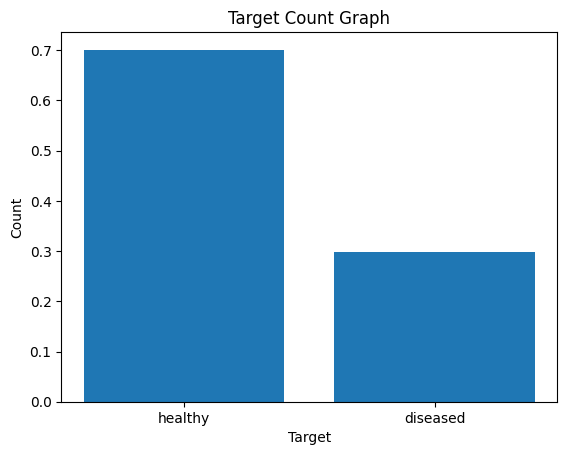

In [11]:
counts = health_df['target'].value_counts(normalize=True)
plt.bar(counts.index, counts.values)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Count Graph")

## Examining Alcohol Consumption

In [12]:
health_df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,28831
Regularly,28782


In [13]:
def mapping(alc):
  if alc=="Occasionally":
    return 1
  elif alc=="Regularly":
    return 2
  else:
    return 0
temp_df = pd.DataFrame({})
temp_df['alcohol_consumption'] = health_df['alcohol_consumption'].apply(mapping)
temp_df["gene_marker_flag"] = health_df['gene_marker_flag'].map({1:1,None:0})
temp_df["target"] = health_df['target']

In [14]:
pd.crosstab(temp_df["alcohol_consumption"],temp_df["target"], normalize=True)
# Imputation Kullanılacak, boş değerleri doldurmak adına

target,diseased,healthy
alcohol_consumption,,
0,0.12847,0.29540
1,0.08552,0.20279
2,0.08504,0.20278


In [15]:
pd.crosstab(temp_df["gene_marker_flag"],temp_df["target"], normalize=True)

target,diseased,healthy
gene_marker_flag,,
0,0.03078,0.07396
1,0.26825,0.62701


## Viewing correlation

<Axes: >

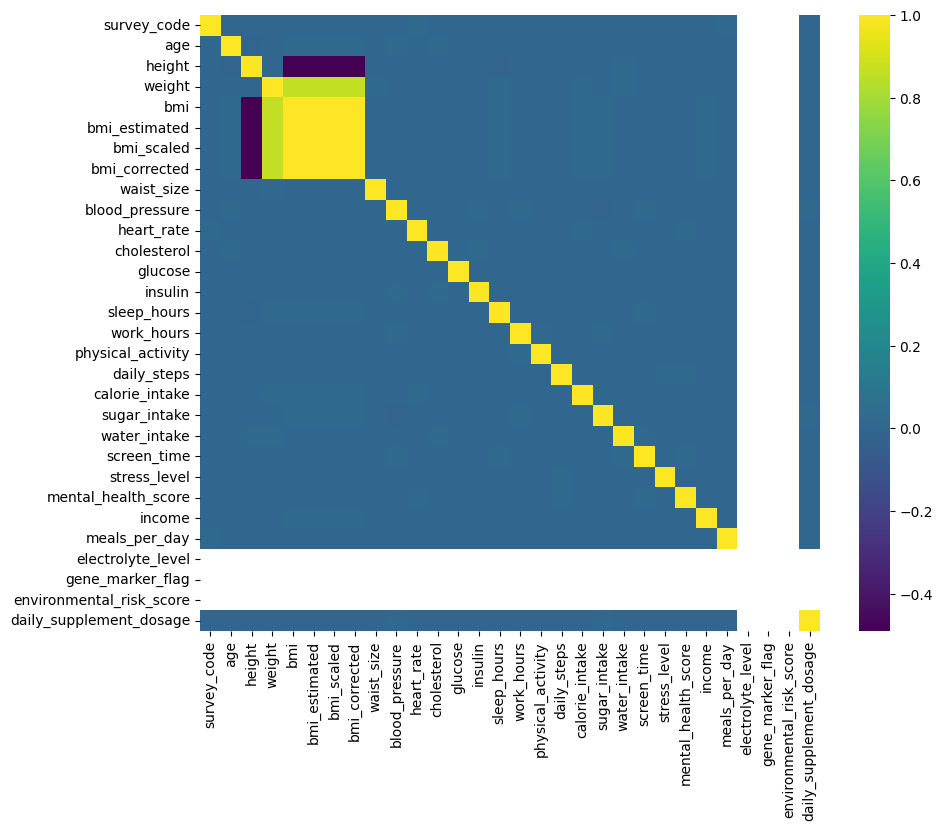

In [16]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')
# bmi lardan biri seçilecek ve onun üzerinden ilerlenecek

## Drop highly correlated columns

In [17]:
hcc = ["bmi_estimated","bmi_scaled","bmi_corrected"]
if all(col in health_df.columns for col in hcc):
    health_df = health_df.drop(columns=hcc)
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Drop Single value columns

In [18]:
columns_to_drop = ["electrolyte_level", "environmental_risk_score"]
if all(col in health_df.columns for col in columns_to_drop):
    health_df = health_df.drop(columns=columns_to_drop)
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'gene_marker_flag', 'daily_supplement_dosage', 'target'],
      dtype='object')


In [19]:
health_df.shape

(100000, 43)

<Axes: >

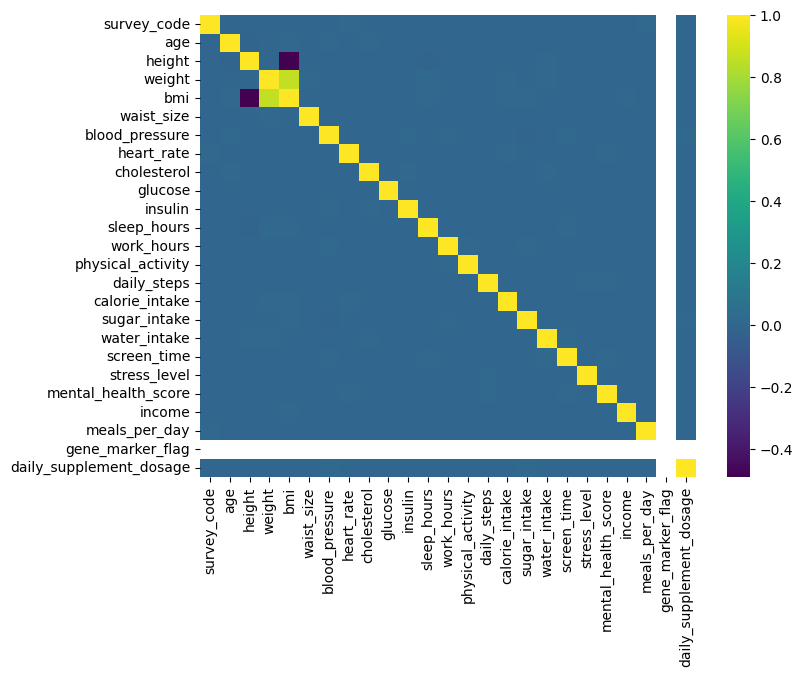

In [20]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')

## Correlation between null values

<Axes: >

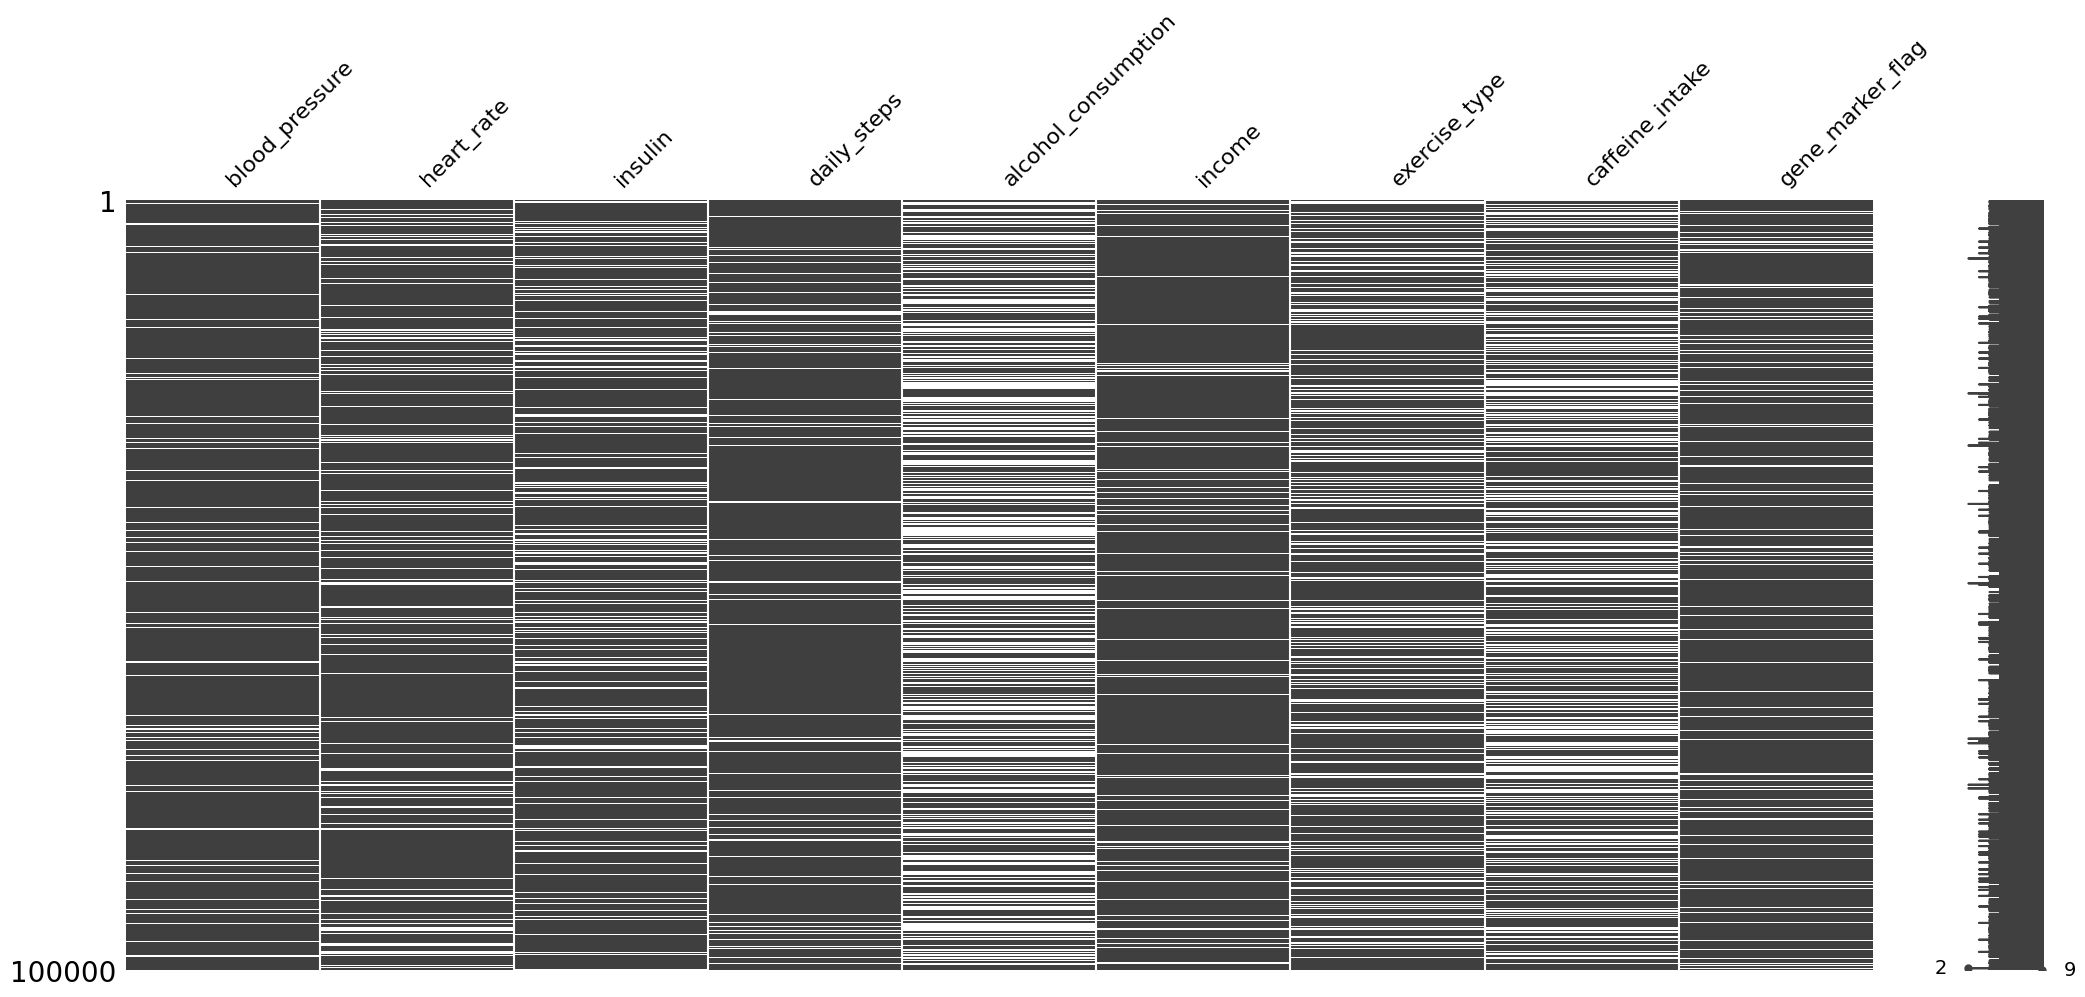

In [22]:
null_df = health_df[[col for col in health_df.columns if health_df[col].isnull().sum()>0]]
msno.matrix(null_df)

we could not see any close correlation of values between features with null values.

## Filling null values

In [23]:
data_info_df[data_info_df["Missing Value"]!=0]

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio
5,gene_marker_flag,100000,10474,0.10474,float64,[ 1. nan],2,1.0,1.0,Nominal
6,income,100000,8470,0.08470,float64,[6759.82171934 6240.51768988 3429.17926628 ......,87873,12029.40935,500.0,Continuous-Ratio
7,daily_steps,100000,8329,0.08329,float64,[13320.94259457 11911.201401 2974.03537534 ...,90935,18064.96954,1000.0,Continuous-Ratio
8,blood_pressure,100000,7669,0.07669,float64,[118.26425414 117.91798577 123.0736977 ... 14...,92332,184.4392,59.12817,Continuous-Ratio


En az null değeri olanı önce doldurup, en sonunda en çok null değeri bulunan sütunu dolduracağız.
We first fill columns with less amount of null values, then at the end, we will fill the column with most amount of null values

In [24]:
health_df_copy = health_df.copy()

From what I have examined, the vast majority of users of this dataset filled numerical values with the mean and textual values with ‘Unknown’. This didn’t seem right to me, so I will ask the assistant about it.

maybe we can delete some rows

In [41]:
for i in range(1,10):
 print("Rows with",i,"Nan:",(health_df_copy.isna().sum(axis=1) > i).sum())

Rows with 1 Nan: 52154
Rows with 2 Nan: 21176
Rows with 3 Nan: 5513
Rows with 4 Nan: 941
Rows with 5 Nan: 86
Rows with 6 Nan: 10
Rows with 7 Nan: 0
Rows with 8 Nan: 0
Rows with 9 Nan: 0


## Important Question:
**data visualization or data filling, which one must performed first?**